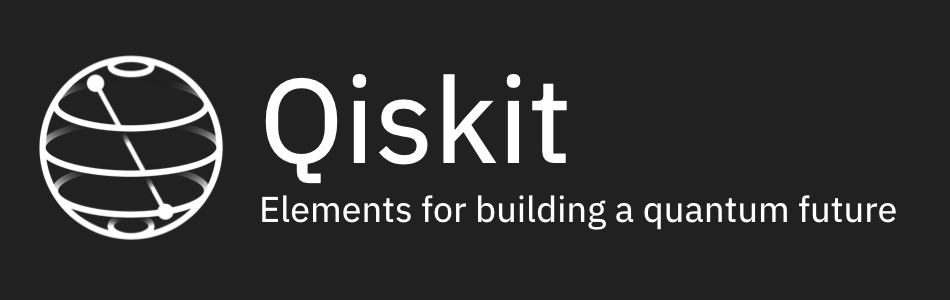

# Getting Started with Qiskit

Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [**quantum circuit**](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In this notebook, we learn how to build a basic circuit

We first import necessary libraries. These are tools that help you with coding your circuit in qiskit.  

In [9]:
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_histogram

## 1. Circuit Basics: Gates <a name='basics'></a>


### Building the circuit

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of one qubit and one classical bit. 

Why do we need a corresponding classical bit? 

In [2]:
# Create a Quantum Circuit acting on a quantum register of one qubit
cr = ClassicalRegister(1)
qr = QuantumRegister(1)
circ = QuantumCircuit(qr,cr)

In [3]:
# Add an X gate on qubit 0
circ.x(qr[0])

# Add a H gate, putting this in superposition
circ.h(qr[0])


## 2. Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

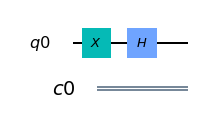

In [4]:
circ.draw(output = 'mpl')


We can have multiple qubits too! Here is an example:

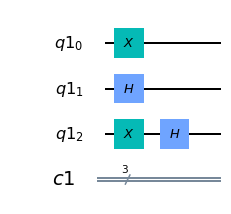

In [8]:
# Create a Quantum Circuit acting on a quantum register of three qubits
cr2 = ClassicalRegister(3)
qr2 = QuantumRegister(3)
circ2 = QuantumCircuit(qr2,cr2)
circ2.x(qr2[0])
circ2.h(qr2[1])
circ2.x(qr2[2])
circ2.h(qr2[2])
circ2.draw(output = 'mpl')

## 3. Your turn

### Question 1: Create a quantum circuit comprising of two qubits. Apply the X gate on the first qubit followed by a hadamard gate. On the second qubit apply the hadamard gate followed by the X gate

### Question 2: Create a quantum circuit comprising of five qubits. Apply the H gate on all the qubits.

### Question 3: Create a quantum circuit comprising of 4 qubits. Apply the H gate on the first qubit, X on the second qubit, two Hadamards on the third qubit and a hadamard and an X gate on the fourth qubit

## 4. Measurements
This signifies the end of your qubits journey - once a qubit is measured, it cannot be used again. The measured qubits converge to a classical value (therefore we provide two arguments to the measure function)

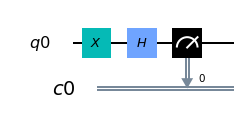

In [5]:
circ.measure(qr, cr)
circ.draw(output='mpl')

## 5. Your turn
Add measurements to all the circuits that you've built

## 6. Run your experiment on a simulator

In [6]:
# We can choose to run our circuit on the various backends available. We choose the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

In [12]:
result = execute(circ, simulator, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'1': 495, '0': 505}


## 7. Your turn
For all the circuits that you've built, run them on the simulator. Plot their histograms